<a href="https://colab.research.google.com/github/juliocnsouzadev/spoken-lang-processing/blob/issue-1-Preprocess_Audio_Files_for_Analysis/visualising_audio_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocess Audio Files for Analysis
Proposed by: https://github.com/juliocnsouzadev/spoken-lang-processing/issues/1
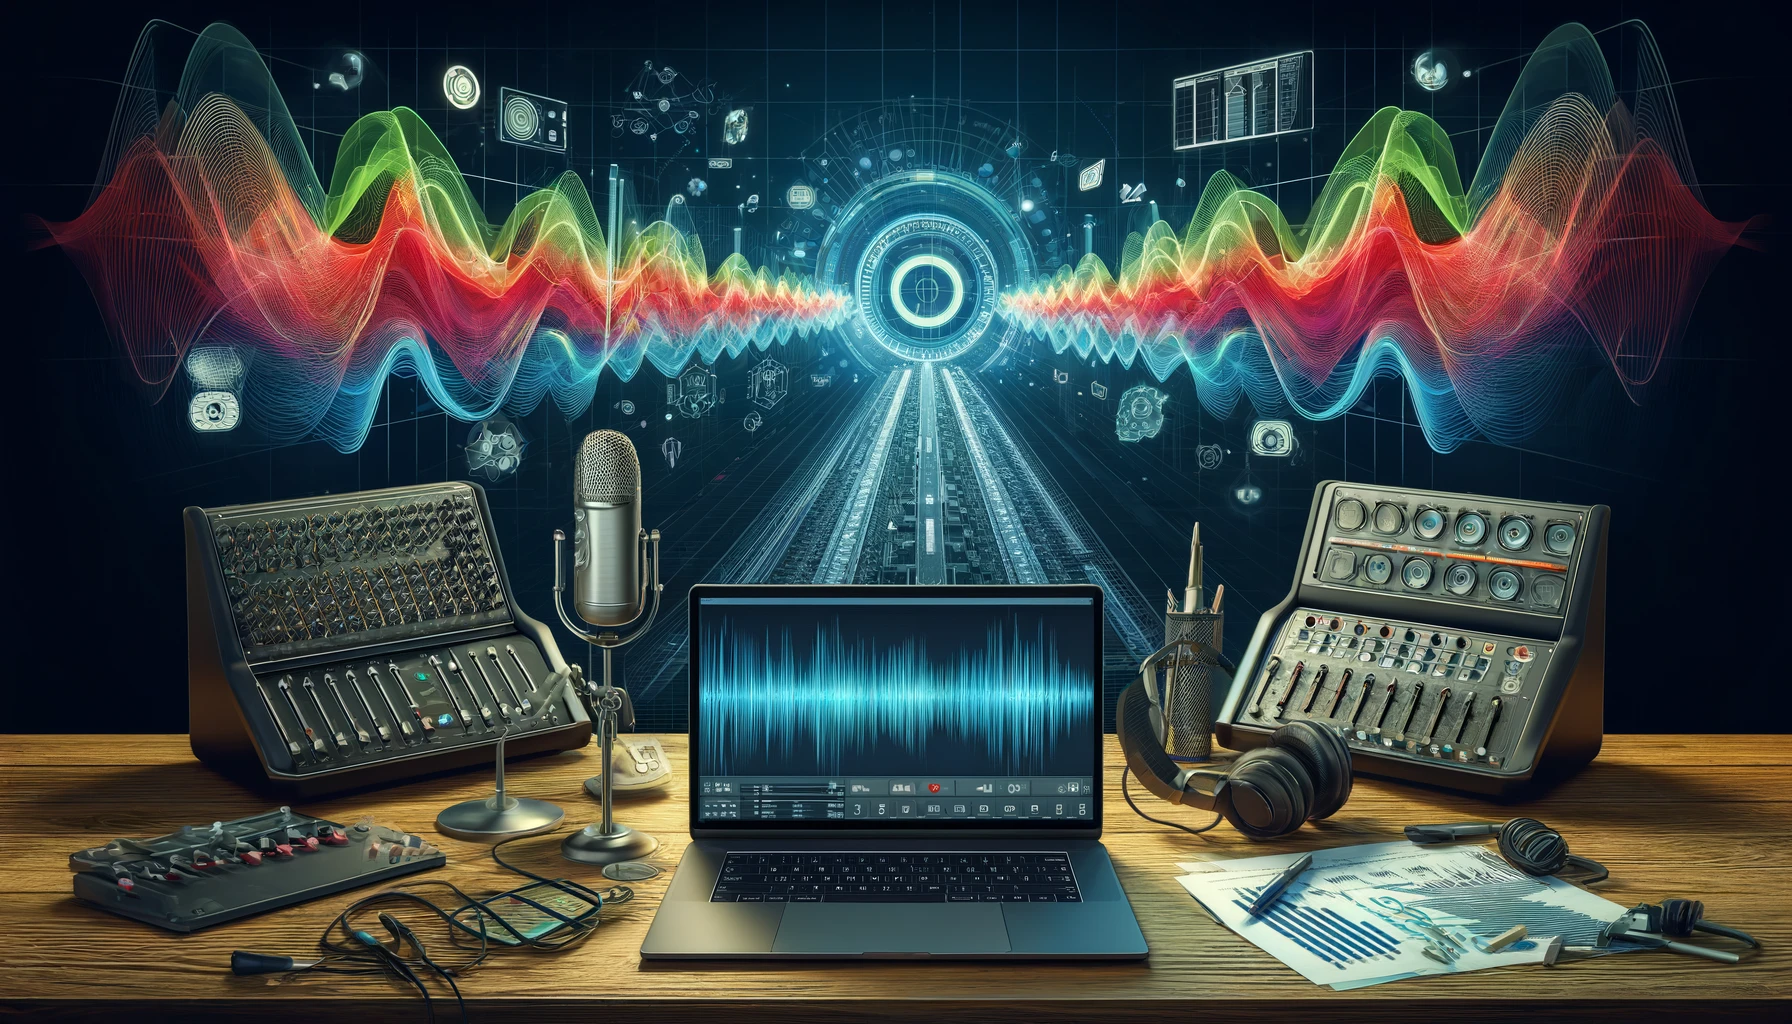

In [18]:
# imports
import wave
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# open files
gm_wav = wave.open('/content/good_morning.wav', 'r')
ga_wav = wave.open('/content/good_afternoon.wav', 'r')

In [20]:
# read frames as bytes
gm_fm = gm_wav.readframes(-1)
ga_fm = ga_wav.readframes(-1)

In [21]:
# convert audio bytes to integers
gm_fm_int = np.frombuffer(gm_fm, dtype='int16')
ga_fm_int = np.frombuffer(ga_fm, dtype='int16')

In [22]:
# get the sound wave frame rate
gm_frame_rate = gm_wav.getframerate()
ga_frame_rate = ga_wav.getframerate()

In [23]:
# find the sound wave timestamps
def get_timestamps(fm_int, frame_rate):
    return np.linspace(start=0,
                        stop=len(fm_int)/frame_rate,
                        num=len(fm_int))

gm_ts = get_timestamps(gm_fm_int, gm_frame_rate)
ga_ts = get_timestamps(ga_fm_int, ga_frame_rate)

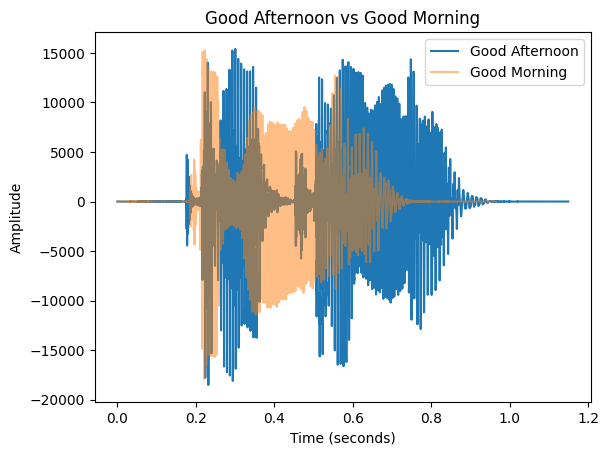

In [24]:
# visualising
def plot_audios(label_a, label_b, ts_a, ts_b, fm_int_a, fm_int_b, ylabel, xlabel):
    # Setup the title and axis titles
    plt.title(label_a + " vs " + label_b)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    plt.plot(ts_a, fm_int_a, label= label_a)
    plt.plot(ts_b, fm_int_b, label=label_b, alpha=0.5)

    plt.legend()
    plt.show()

label_a = 'Good Afternoon'
label_b = "Good Morning"
ylabel = 'Amplitude'
xlabel = 'Time (seconds)'

plot_audios(
    label_a, label_b,
    ga_ts, gm_ts,
    ga_fm_int, gm_fm_int,
    ylabel, xlabel
)